In [55]:
import nltk
import random
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import re


# from nltk.stem.snowball import SnowballStemmer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


data = None
with open('sg_law_cleaned.txt', 'r', encoding='UTF-8') as data_file:
    data = data_file.read()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kieth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kieth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kieth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
# Filter out words that ends with symbols
stop_words = nltk.corpus.stopwords.words('english')
def list_filter(x):
    blacklist = ['.', '-', ':']
    for c in blacklist:
        if c in x:
            return False
    if x.lower() in stop_words:
        return False
    result = re.compile('\\w+[^1-9\\.\\-\\s]').match(x)
    if result == None:
        return False
    # return True
    if result.start() == 0:
        return True
    return False

In [59]:
def display_top_tokens(tokens, start = 0, end = 20):
    word_count_dict = {}
    for word in tokens:
        if word not in word_count_dict:
            word_count_dict[word] = 1
        else:
            word_count_dict[word] += 1
    word_count_dict = {k: v for k, v in sorted(word_count_dict.items(), key=lambda item: item[1], reverse=True)}
    items = list(word_count_dict.items())
    print('%d unique tokens' % len(items))
    for i, item in enumerate(items[start:end]):
        print(i+1, ':', item)
    return word_count_dict

def display_top_20_tokens(tokens):
    return display_top_tokens(tokens, 0, 20)

In [61]:
word_list = list(filter(list_filter, nltk.word_tokenize(data)))
word_list_dict = display_top_20_tokens(word_list)

4306 unique tokens
1 : ('Act', 733)
2 : ('shall', 626)
3 : ('person', 524)
4 : ('may', 420)
5 : ('means', 338)
6 : ('section', 260)
7 : ('Singapore', 216)
8 : ('place', 212)
9 : ('Convention', 211)
10 : ('officer', 207)
11 : ('carrier', 194)
12 : ('carriage', 188)
13 : ('offence', 185)
14 : ('made', 181)
15 : ('case', 176)
16 : ('court', 168)
17 : ('wef', 164)
18 : ('subsection', 158)
19 : ('contract', 155)
20 : ('order', 150)


In [63]:
_ = display_top_tokens(word_list, 4000, 4020)

4306 unique tokens
1 : ('falsifies', 1)
2 : ('falsification', 1)
3 : ('Board19', 1)
4 : ('remitted', 1)
5 : ('Board22', 1)
6 : ('authorisation', 1)
7 : ('Prosecutor23', 1)
8 : ('Priority', 1)
9 : ('taxes', 1)
10 : ('203', 1)
11 : ('unsecured', 1)
12 : ('Offence', 1)
13 : ('corporate25', 1)
14 : ('provision27', 1)
15 : ('revoked', 1)
16 : ('replaced', 1)
17 : ('197/2007', 1)
18 : ('01/07/2007', 1)
19 : ('encroachments', 1)
20 : ('encroachment2', 1)


In [65]:
# TBC (Stemming)
stemmer = nltk.stem.snowball.SnowballStemmer('english')
stem = []
for word in word_list:
    stem.append(stemmer.stem(word))
stem_dict = display_top_20_tokens(stem)

2653 unique tokens
1 : ('act', 821)
2 : ('shall', 626)
3 : ('person', 595)
4 : ('may', 432)
5 : ('mean', 387)
6 : ('offic', 288)
7 : ('contract', 279)
8 : ('section', 275)
9 : ('place', 262)
10 : ('court', 260)
11 : ('relat', 219)
12 : ('singapor', 216)
13 : ('convent', 214)
14 : ('carrier', 213)
15 : ('offenc', 201)
16 : ('carriag', 198)
17 : ('case', 193)
18 : ('purpos', 191)
19 : ('made', 181)
20 : ('articl', 173)


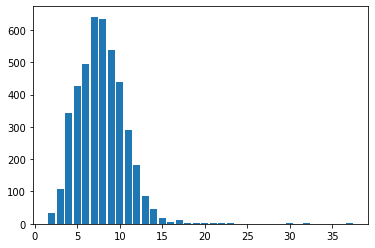

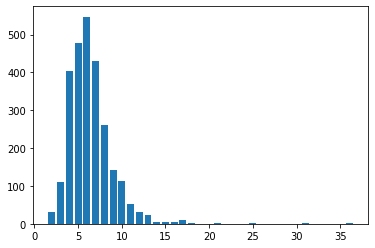

In [67]:
for m_dict in [word_list_dict, stem_dict]:
    count_dict = {}
    for token in m_dict.keys():
        token_len = len(token)
        if token_len not in count_dict:
            count_dict[token_len] = 1
        else:
            count_dict[token_len] += 1
    # Plot x and y
    x = count_dict.keys()
    y = list(count_dict.values())
    plt.figure()
    plt.bar(x, y)
    # print (count_dict)

In [69]:
# Sentence Segmentation
sentences = nltk.sent_tokenize(data)
distribution = {
    'sentence_length': [],
    'num_sentences': []
}
for sentence in sentences:
    sentence_length = len(nltk.word_tokenize(sentence))
    index = None
    try:
        index = distribution['sentence_length'].index(sentence_length)
        distribution['num_sentences'][index] += 1
    except:
        distribution['sentence_length'].append(sentence_length)
        distribution['num_sentences'].append(1)        

In [71]:
distribution_tuples = []
for i in range(len(distribution['sentence_length'])):
    distribution_tuples.append((distribution['sentence_length'][i],distribution['num_sentences'][i]))
distribution_tuples.sort(key=lambda x: x[0])
# distribution_tuples

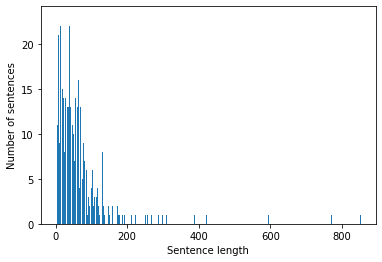

223


In [72]:
truncated_tuples = [m_tuple for m_tuple in distribution_tuples if m_tuple[1]]

# plt.figure(figsize=(16,4))
# plt.subplot(1,2,1)
plt.figure()
# plt.add_axes([0,0,1,1])
zipped = [*zip(*truncated_tuples)]
plt.bar(zipped[0],zipped[1])
plt.ylabel('Number of sentences')
plt.xlabel('Sentence length')
plt.show()

# plt.subplot(1,2,2)
# plt.figure()
# plt.plot(*zip(*truncated_tuples))
# plt.margins(0)
# plt.ylabel('Number of sentences')
# plt.xlabel('Sentence length')
# plt.ylim(ymin=1)
# plt.xlim(xmin=1)
# plt.show()

print(len(distribution_tuples))


In [73]:

# distribution_tuples
mydf = pd.DataFrame({"sentence_length":zipped[0], "no_sentences":zipped[1]})
mydf.describe()

,sentence_length,no_sentences
count,223.000000,223.000000
mean,146.147982,5.506726
std,138.408003,5.472182
min,2.000000,1.000000
25%,57.500000,1.000000
50%,113.000000,3.000000
75%,188.500000,9.000000
max,852.000000,23.000000


In [74]:
# POS Tagging
selected_sentences = random.sample(sentences, 3)
for sentence in selected_sentences:
    print(sentence)
    print(nltk.pos_tag(nltk.word_tokenize(sentence)))
    print()
    print()

(2)  Questions of procedure shall be governed by the law of the court seised of the case.Article 29(1)  The right to damages shall be extinguished if an action is not brought within two years, reckoned from the date of arrival at the destination, or from the date on which the aircraft ought to have arrived, or from the date on which the carriage stopped.
[('(', '('), ('2', 'CD'), (')', ')'), ('Questions', 'NNS'), ('of', 'IN'), ('procedure', 'NN'), ('shall', 'MD'), ('be', 'VB'), ('governed', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('law', 'NN'), ('of', 'IN'), ('the', 'DT'), ('court', 'NN'), ('seised', 'VBD'), ('of', 'IN'), ('the', 'DT'), ('case.Article', 'NN'), ('29', 'CD'), ('(', '('), ('1', 'CD'), (')', ')'), ('The', 'DT'), ('right', 'NN'), ('to', 'TO'), ('damages', 'NNS'), ('shall', 'MD'), ('be', 'VB'), ('extinguished', 'VBN'), ('if', 'IN'), ('an', 'DT'), ('action', 'NN'), ('is', 'VBZ'), ('not', 'RB'), ('brought', 'VBN'), ('within', 'IN'), ('two', 'CD'), ('years', 'NNS'), (',', ','), ('